In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openbb import obb
import pyfinlib
import logging

# logging.basicConfig(level=logging.DEBUG)

# Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS']

# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])

# Set an initial investment level
initial_investment = 1000000


In [2]:
data = obb.equity.price.historical(symbol=tickers, provider='yfinance')
data.results[0].date, data.results[-1].date

(datetime.date(2024, 2, 15), datetime.date(2025, 2, 14))

In [3]:
returns = pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'AAPL'])
portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset(.25, "AAPL", [i.close for i in data.results if i.symbol == 'AAPL']),
        pyfinlib.PortfolioAsset(.3, "META", [i.close for i in data.results if i.symbol == 'META']),
        pyfinlib.PortfolioAsset(.15, "C", [i.close for i in data.results if i.symbol == 'C']),
        pyfinlib.PortfolioAsset(.3, "DIS", [i.close for i in data.results if i.symbol == 'DIS']),
     ]
)

aapl_portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset(1., "AAPL", [i.close for i in data.results if i.symbol == 'AAPL'])
    ]
)
VaR_historical = aapl_portfolio.value_at_risk_percent(0.05)
VaR_historical_10 = aapl_portfolio.value_at_risk_percent(0.1)
VaR_historical, VaR_historical_10

(-0.023538456317296196, -0.018062230402611013)

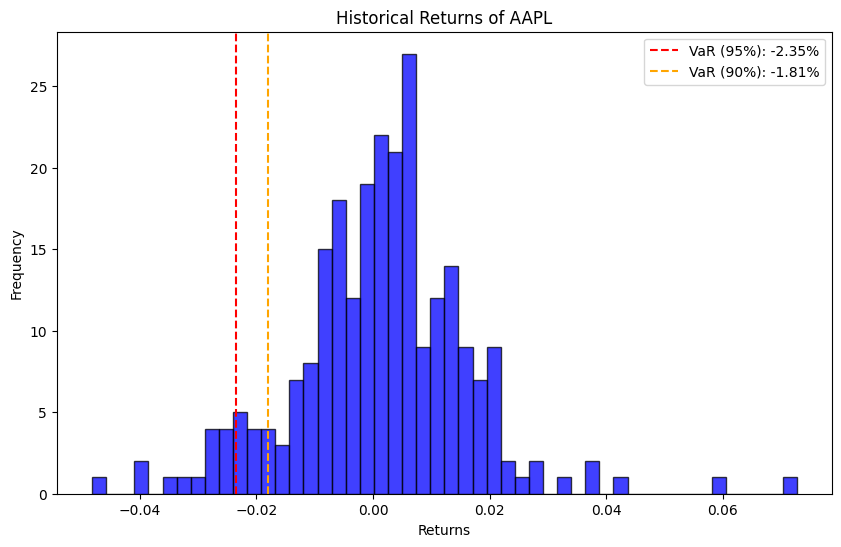

In [4]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='orange', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.title('Historical Returns of AAPL')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
value = portfolio.value_at_risk(0.01, 1_000_000.)
value

1001159.1538127009


-1159.1538127008826

1 day VaR @ 95% confidence: -1159.15
2 day VaR @ 95% confidence: -1639.29
3 day VaR @ 95% confidence: -2007.71
4 day VaR @ 95% confidence: -2318.31
5 day VaR @ 95% confidence: -2591.95
6 day VaR @ 95% confidence: -2839.34
7 day VaR @ 95% confidence: -3066.83
8 day VaR @ 95% confidence: -3278.58
9 day VaR @ 95% confidence: -3477.46
10 day VaR @ 95% confidence: -3665.57
11 day VaR @ 95% confidence: -3844.48
12 day VaR @ 95% confidence: -4015.43
13 day VaR @ 95% confidence: -4179.39
14 day VaR @ 95% confidence: -4337.16
15 day VaR @ 95% confidence: -4489.38


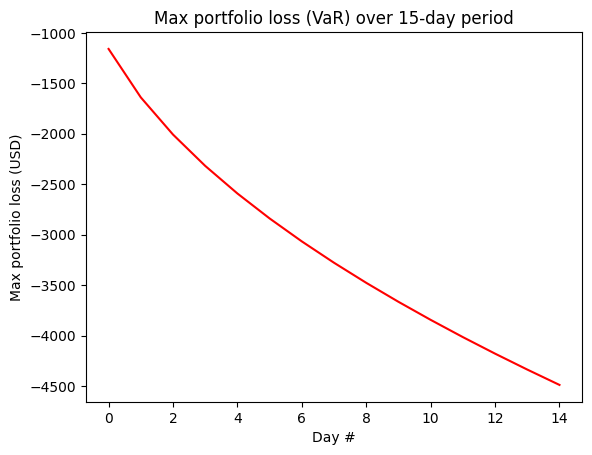

In [6]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(value * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(value * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")